In [1]:
from moviepy.editor import VideoClip, VideoFileClip
from moviepy.editor import ipython_display
import cv2
import numpy as np
import os
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 1. moviepy를 이용해서 주피터 노트북 상에서 비디오를 읽고 쓰는 프로그램 작성

In [3]:
# 읽기
video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/video2.mp4'
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))

# 쓰기
result_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult.mp4'
clip.write_videofile(result_video_path)

chunk:  13%|█▎        | 38/297 [00:00<00:00, 375.74it/s, now=None]

Moviepy - Building video /home/ssac2/aiffel/video_sticker_app/images/mvpyresult.mp4.
MoviePy - Writing audio in mvpyresultTEMP_MPY_wvf_snd.mp3


t:   1%|▏         | 6/404 [00:00<00:06, 59.71it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video /home/ssac2/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/ssac2/aiffel/video_sticker_app/images/mvpyresult.mp4


### 2. moviepy로 읽은 동영상을 numpy 형태로 변환하고 영상 밝기를 50% 어둡게 만든 후에 저장

In [4]:
# 읽기
video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/video2.mp4'
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))

# clip 에서 numpy 로 데이터 추출
vlen = int(clip.duration*clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype=np.uint8)
for i in range(vlen):
    img = clip.get_frame(i/clip.fps)
    video_container[i] = (img * 0.5).astype(np.uint8)

# 새 clip 만들기
dur = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t*clip.fps))], duration=dur)

# 쓰기
result_video_path2 = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult2.mp4'
outclip.write_videofile(result_video_path2, fps=30)

t:  12%|█▏        | 48/403 [00:00<00:00, 454.55it/s, now=None]

Moviepy - Building video /home/ssac2/aiffel/video_sticker_app/images/mvpyresult2.mp4.
Moviepy - Writing video /home/ssac2/aiffel/video_sticker_app/images/mvpyresult2.mp4



Moviepy - Done !
Moviepy - video ready /home/ssac2/aiffel/video_sticker_app/images/mvpyresult2.mp4


### 3. 영상을 읽고 쓰는 시간을 측정. OpenCV를 사용할때와의 차이를 측정해보기

In [5]:
# CASE 1 : moviepy 사용
start = cv2.getTickCount()
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)

vlen = int(clip.duration*clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype=np.uint8)

for i in range(vlen):
    img = clip.get_frame(i/clip.fps)
    video_container[i] = (img * 0.5).astype(np.uint8)

dur = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t*clip.fps))], duration=dur)

mvpy_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult.mp4'
outclip.write_videofile(mvpy_video_path, fps=30)

time = (cv2.getTickCount() - start) / cv2.getTickFrequency()
print (f'[INFO] moviepy time : {time:.2f}ms')

t:  12%|█▏        | 48/403 [00:00<00:01, 314.72it/s, now=None]

Moviepy - Building video /home/ssac2/aiffel/video_sticker_app/images/mvpyresult.mp4.
Moviepy - Writing video /home/ssac2/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/ssac2/aiffel/video_sticker_app/images/mvpyresult.mp4
[INFO] moviepy time : 4.32ms


In [6]:
# CASE 2 : OpenCV 사용
start = cv2.getTickCount()
vc = cv2.VideoCapture(video_path)

cv_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/cvresult.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
vw = cv2.VideoWriter(cv_video_path, fourcc, 30, (640,360))

vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))

for i in range(vlen):
    ret, img = vc.read()
    if ret == False: break
    
    img_result = cv2.resize(img, (640, 360)) * 0.5
    vw.write(img_result.astype(np.uint8))
    
time = (cv2.getTickCount() - start) / cv2.getTickFrequency()
print (f'[INFO] cv time : {time:.2f}ms')

[INFO] cv time : 2.14ms


### 4. moviepy를 이용할 때의 장단점 분석

MoviePy의 특징
- 간단하며 직관적임
- Flexibile함
- Protable함
- numpy와의 호환성

<장점>
1. 여러 비디오에 대해 처리할 때 (or 합칠 때) 유용하다.
2. 다른 편집 프로그램 없이 video effect를 추가하고 싶을 때
3. 여러 이미지를 이용해서 GIF를 만들고 싶을 때

<단점>
1. OpenCV 보다 처리속도가 느리다.
2. frame-by-frame 비디오 분석에 사용할 때는 OpenCV가 더 적합하다.
3. 비디오파일을 단순히 이미지로 쪼개고 싶을 때는 OpenCV가 더 적합하다.

# Webcam 입력을 사용하는 경우

### 1. 실시간 카메라 스티커앱 만들기

- webcam_sticker.py

<pre>
<code>

import numpy as np
import cv2
import dlib

from newaddsticker import img2sticker

detector_hog = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor('./models/shape_predictor_68_face_landmarks.dat')

def main():
    cv2.namedWindow('show', 0)
    cv2.resizeWindow('show', 640, 360)

    vc = cv2.VideoCapture(0)
    img_sticker = cv2.imread('./images/king.png')

    vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))
    print (vlen) # 웹캠은 video length 가 0 입니다.

    # 정해진 길이가 없기 때문에 while 을 주로 사용합니다.
    # for i in range(vlen):
    while True:
        ret, img = vc.read()
        if ret == False:
            break
        start = cv2.getTickCount()
        img = cv2.flip(img, 1)  # 보통 웹캠은 좌우 반전

        # 스티커 메소드를 사용
        img_result = img2sticker(img, img_sticker.copy(), detector_hog, landmark_predictor)   

        time = (cv2.getTickCount() - start) / cv2.getTickFrequency() * 1000
        print ('[INFO] time: %.2fms'%time)
        
        cv2.imshow('show', img_result)
        key = cv2.waitKey(1)
        if key == 27:
            break


if __name__ == '__main__':
    main()
    
</code>
</pre>

### 2. 스티커앱을 실행하고 카메라를 고정하고 서서히 멀어져본다. 혹은 아주 가까이 다가가본다. (얼굴을 찾지 못하는 거리를 기록해보기)

일반적으로 약 15cm ~ 1m 30cm 범위 사이에서 얼굴 인식이 가능하다고 함.

실제로 카메라에 가까이 갔을 때는 얼굴영역이 렌즈에 잡히는 순간까지는 왕관이 출력되는 것을 확인하였다. 방에서 했을 때는 벽 끝과 끝까지 이동했을때까지 얼굴 인식이 잘 되고 있는 것을 확인할 수 있었다. (대락 2~3m 정도?!)

### 3. 고개를 상하좌우로 움직여서 yaw, pitch, roll 각도의 개념을 직접 실험해보고 각각 몇 도 까지 정상적으로 스티커앱이 동작하는지 기록해보기

- yaw : y축 기준 회전 → 높이 축
- picth : x축 기준 회전 → 좌우 축
- roll : z축 기준 회전 → 거리 축

일반적으로 허용되는 범위는 yaw : -45 ~ 45도, pitch : -20 ~ 30도, roll : -45 ~ 45도 이다.

### 4. 만들고 싶은 스티커앱의 스펙 (허용거리, 허용 인원 수, 허용 각도, 안정성)을 정해보자.

거리 : 3m 이내 (팔을 최대로 뻗었을 때의 거리는 대략 1m 정도이고, 단체사진을 찍는 상황을 가정할 때, 3m 정도 떨어진 거리에서 촬영하는 것 같다)

인원 수 : 렌즈 내에 담기는 거리 내의 최대 인원

허용 각도 : 일반적인 허용 범위를 따르면 충분할 것 같다. (그보다 더 큰 허용범위는 아직 hog_detector로는 잡아내지 못할 것 같기 때문)

안정성 : 위 조건을 만족하면서 FPPI (false positive per image) 기준 < 0.003, MR (miss rate) < 1 300장당 1번 에러 = 10초=30*10에 1번 에러

# 스티커 Out Bound 예외 처리하기

### 1) 지금까지 만든 스티커 앱을 이용해서 예외 상황을 찾아보기 (서서히 영상에서 좌우 경계 밖으로 나가며 코드의 행동을 확인해보기)

얼굴이 영역 밖으로 나가는 경우에 해당 에러를 뱉어내며 어플리케이션이 종료된다.

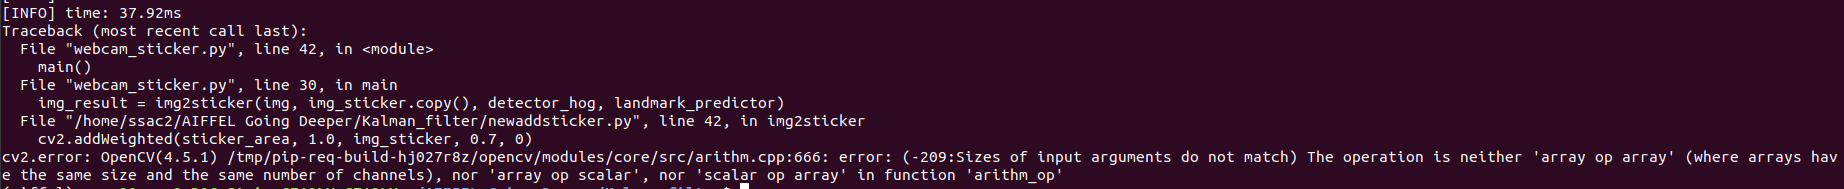

### 2) 문제가 어디에서 발생하는지 코드에서 확인

얼굴이 카메라 왼쪽 경계를 벗어나서 detection 되는 경우 refined_x 의 값이 음수가 됩니다.
img_bgr[..., refined_x:...] 에서 numpy array의 음수 index에 접근하게 되므로 예외가 발생합니다. 

### 3) Out bound 오류 (경계 밖으로 대상이 나가서 생기는 오류)를 해결해보기

<pre>
<code>

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
elif refined_x + img_sticker.shape[1] >= img_orig.shape[1]:
    img_sticker = img_sticker[:, :-(img_sticker.shape[1]+refined_x-img_orig.shape[1])]
    
</code>
</pre>

### 4) 다른 예외는 어떤 것들이 있는지 정의해보기

- 왕관의 크기가 너무 일정함.
- 고개를 갸우뚱하게 해도 그거에 맞게 왕관이 기울여지지 않는다.

# 스티커앱 분석 - 거리, 인원 수, 각도, 시계열 안정성

### 1. 멀어지는 경우에 왜 스티커앱이 동작하지 않는지 분석해보자. (detection, landmark, blending 단계 중 무엇이 문제일까?)

dlib detection이 문제이다. 거리가 멀어지게 되면 hog detector가 얼굴 영역을 제대로 검출해내지 못함 -> bbox가 출력되지 않는다.

<pre>
<code>

# preprocess
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
# detector
img_rgb_vga = cv2.resize(img_rgb, (640, 360))
dlib_rects = detector_hog(img_rgb_vga, 0)
if len(dlib_rects) < 1:
    return img_orig
    
</code>
</pre>

### 2. detector_hog의 문제를 해결하기 위해, 이미지 피라미드를 조절하여 성능을 향상시키는 간단한 방법이 있다. 이 방법을 활용하여 img2sticker 메소드를 고쳐보자.

<pre>
<code>

def img2sticker(img_orig, img_sticker, detector_hog, landmark_predictor):
    # preprocess
    img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

    # detector
    img_rgb_vga = cv2.resize(img_rgb, (640, 360))
    dlib_rects = detector_hog(img_rgb_vga, 1) # <- 이미지 피라미드 수 변경
    if len(dlib_rects) < 1:
        return img_orig

    # landmark
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb_vga, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

</code>
</pre>

### 3. 위에서 시도한 방법의 문제점은 무엇인가?

속도가 현저하게 느려진다. 기존 30ms/frame 에서 120ms/frame으로 4배가량 느려짐 -> 이는 실시간 구동이 불가능하다는 것을 의미한다.

### 4. 실행시간을 만족할 수 있는 방법을 찾아보자.

hog 디텍터를 딥러닝 기반 디텍터로 변경할 수 있다. hog 학습 단계에서 다양한 각도에 대한 hog 특징을 모두 추출해서 일반화 하기 어렵기 때문에 딥러닝 기반 검출기의 성능이 훨씬 좋다.

opencv는 intel cpu 을 사용할 때 dnn 모듈이 가속화를 지원하기 때문에 mobilenet 과 같은 작은 backbone 모델을 사용하고 ssd를 사용한다면 충분히 만족할 만한 시간과 성능을 얻을 수 있다.

# 칼만 필터 적용하기

### 1. 카메라 앞에서 가만히 있을 때 스티커의 움직임을 관찰해보자. 어떠한 문제가 발생하는가?

가만히 있어도 스티커의 크기가 일정하게 유지되지 않고, 떨리는 것처럼 보이는 현상이 발생한다. (얼굴을 검출하는 단계에서 새로고침(?) 같은 현상 때문에 이렇게 보이는 것 같다.)

### 2. 칼만 필터를 적용해서 스티커 움직임을 안정화시키자.

<pre>
<code>
import numpy as np
import cv2
import dlib

from newaddsticker import img2sticker
from kfaddsticker import img2sticker_kf

detector_hog = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor('./models/shape_predictor_68_face_landmarks.dat')

def main():
    cv2.namedWindow('show', 0)
    cv2.resizeWindow('show', 640, 360)

    vc = cv2.VideoCapture(0)
    img_sticker = cv2.imread('./images/king.png')

    vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))
    print (vlen) # 웹캠은 video length 가 0 입니다.

    # 정해진 길이가 없기 때문에 while 을 주로 사용합니다.
    # for i in range(vlen):
    while True:
        ret, img = vc.read()
        if ret == False:
            break
        start = cv2.getTickCount()
        img = cv2.flip(img, 1)  # 보통 웹캠은 좌우 반전

        '''
        # 스티커 메소드를 사용
        img_result = img2sticker(img, img_sticker.copy(), detector_hog, landmark_predictor)   
        '''
        # 칼만 필터 적용
        img_result = img2sticker_kf(img, img_sticker.copy(), detector_hog, landmark_predictor)
        
        time = (cv2.getTickCount() - start) / cv2.getTickFrequency() * 1000
        print ('[INFO] time: %.2fms'%time)
        
        cv2.imshow('show', img_result)
        key = cv2.waitKey(1)
        if key == 27:
            break

if __name__ == '__main__':
    main()

</code>
</pre>

뭔가 빨리진거 같긴 한데, 난데없이 이상한 곳에 왕관이 출력되는 경우도 있다.. =ㅁ=;